In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (8,6)

In [2]:
N = 100
var_lik = 0.05 # Variance of the likelihood $\sigma^2$
epsilon = 1e-6

x = np.linspace(0, 4*np.pi, N)
y = np.sin(x) + np.random.normal(0, np.sqrt(var_lik), N)
y_actual = np.sin(x)

l_list = [0.2, 0.5, 1, 2, 10]

In [3]:
def kappa(x, x_prime, l):
  return np.exp( -1 * ((x - x_prime)**2) / (l**2) )

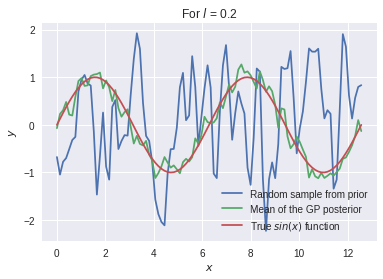

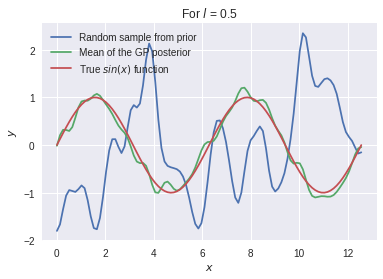

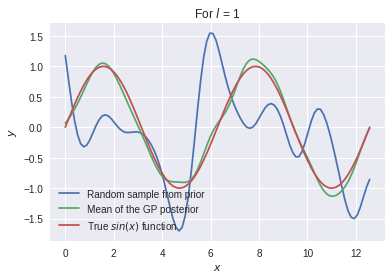

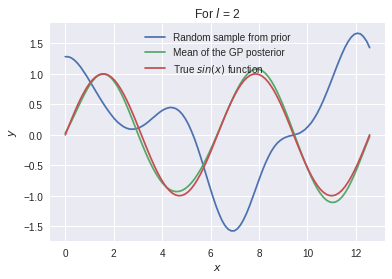

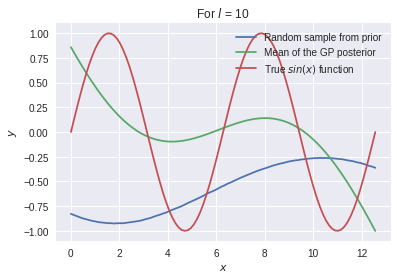

In [4]:
for l in l_list:
  # Kernel matrix
  mean_prior = np.zeros((N))
  K = np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      K[i,j] = kappa(x[i], x[j], l)

    K[i,i] = K[i,i] + epsilon

  prior = np.random.multivariate_normal(mean_prior, K)
  plt.plot(x, prior, label="Random sample from prior")
  
  mean_posterior = np.matmul( np.linalg.inv( var_lik * np.linalg.inv(K) + np.identity(N) ), y)
  plt.plot(x, mean_posterior, label="Mean of the GP posterior")
  
  plt.plot(x, y_actual, label="True $sin(x)$ function")
  plt.title("For $l$ = " + str(l))
  plt.xlabel("$x$")
  plt.ylabel("$y$")
  plt.legend()
  plt.show()